## Project 2 - Supervised Learning - A mix of Classification and Regression Model via Gradient Descent
### Due: Nov/19/2021 Frinday 11:59 PM

### Project Description
In the data, there are four columns - $x$, $y$, $z$, and class where $z$ is the continous target and the class categorizes each $z$. Knowing that $z$ is a function 

For each class $k$, $z_k$ is a sum of multiple exponential functions as shown below: 

$$z_k(x,y)=-C\Big[\Big(\sum_{n,m=1}^4\exp\big[{-\big((x+C_{kn})^2+(y+C_{km})^2\big)\big]}\Big)+\exp\big[-(x+C_{k})^2)\big]+\exp{\big[-(y+C_{k})^2\Big]}\big]$$
where $C$, $C_k$, $C_{km}$, and $C_{kn}$ are unkonwn constant where $C$ is the same for all $k$s. 

The goal is to build a model that predidicts $z$, $M(H,Z)$, where $M(H,Z)$ is the combination of classifier $H(x,y)$ and regression $Z(z_k(x,y))$ where $z_k(x,y)$ is a submodel for each $k$: 
$$Z(x,y,k)=Z(z_1,z_2,\cdots,z_k)$$
The workflow can summarize as following:
1. classify $k$ using $H$ and identify the class $k^*$.
2. predict $z$ using indiviual $z_k\in Z$.

$$x,y,k\implies H(x,y) \implies \text{output:} k^* \implies Z(z_k(x,y,k)) \text{for each k} \implies \text{output:} z^*$$

### Model Implementation

#### Classifier $H(x,y)$: [30 pts]

Using `sklearn`, build a classifier $H(x,y)$ to classify `class` $k$. 
- use logistic regression and SVM.
- report the accuracy of each classifier and choose one for $H$ with explanaitons. 
- predict $k$ using $H$.  

#### Regressions $Z(x,y,k)$: [30 pts]
Using `sklearn`, build $k$ many models that predicts $z$ for each $k$ and determine the constants, $C$, $C_k$, $C_{km}$ and $C_{kn}$, for each $z_k$. 
- ues linear regression and Gaussain Process.
- report the constants and room mean squared error (RMSE) for each aglorithm for each $k$. 
$$\text{RMSE}=\Big(\sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-z_i^*)^2}\Big)$$ 
where $z_i^*$ is the predicted value of $z_i$

#### M(H,Z) Evaluation [10 pts]
Build a function that predicts z using the learn from $H$. 
- report the overall RMSE. 

#### Gradient Descent [30 pts]
Using `numpy` and `pandas`, implement the a gradient descent function to estimate the constants for each $z_k$ using MSE:

$$\text{Mean Square Error (MSE)} = \frac{1}{2}\sum_{i=1}^n(z_i-z_i^*)^2$$
- determine constants, $C$, $C_k$, $C_{km}$, and $C_{kn}$, for each $k$
- test which learning rate $\eta$ terminates faster when the acceptance error $\epsilon$ is $\epsilon\le0.005$ and the learning rate $\eta$ is $[10^{-2},10^{-3},10^{-4}$]. If the given $\eta$ is not sufficient, then test with different $\eta$. 
- present the true model $Z_k$.
- predict $z$ and report RMSE. Do for each $k$ and overall. 

<IPython.core.display.Javascript object>


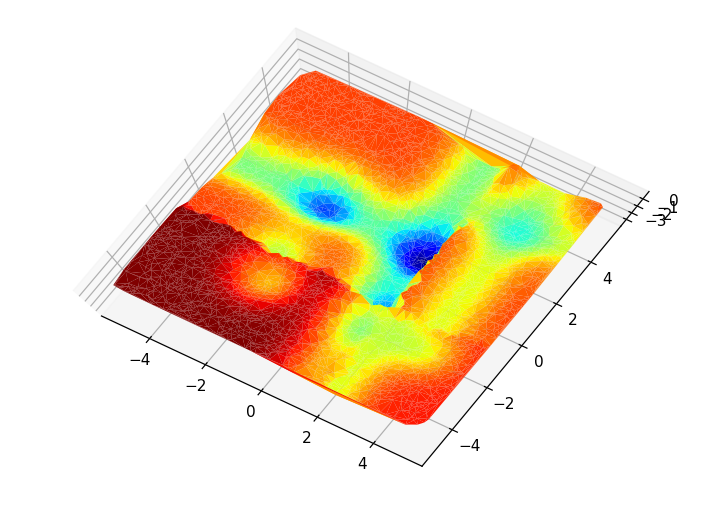

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib notebook
df = pd.read_csv('F21_CS559_Project2.csv')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
plt.show()